In [ ]:
import pandas as pd
import io
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

sns.set(style = 'whitegrid')

Saving DesafioEstagioMachineLearning.csv to DesafioEstagioMachineLearning (1).csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['DesafioEstagioMachineLearning.csv'].decode('utf-8')))

#<b>Análise e dados - Desafio Técnico Estagiário em Machine Learning</b>

Um cliente da Geofusion que atua no <b>setor alimentício</b> na cidade do Rio de Janeiro gostaria de <b>entender melhor sobre o seu público alvo.</b> Dadas as variáveis sociodemográficas (presentes no dicionário de dados) e a variável de performance faturamento, <b>realize uma análise exploratória trazendo insights sobre o público alvo da rede e crie um modelo de regressão capaz de prever o faturamento em novos bairros,</b> caso o nosso cliente queira realizar um projeto de expansão.

##<b>Objetivo da Análise</b>

O objetivo dessa análise de dados será trazer informações que sejam importantes para o nosso cliente voltados ao setor que está atuando, observando em quais pontos das cidade do Rio de Janeiro onde possui os melhores lugares para estabecer um loja e com maior poder de compra, para que o nosso cliente saiba onde distribuir suas lojas e as vendas de seus produtos

In [ ]:
data

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3304557062,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,3304557093,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,3304557091,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,3304557065,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,921875.0


##<b>Tratamento dos Dados</b>

Verificando registros duplicados

In [ ]:
data[data.duplicated(['codigo'], keep=False)]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento


Removendo coluna de códigos

In [ ]:
data = data.iloc[:, 1:]

In [ ]:
data

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,921875.0


Verificando se os tipos de dados estão certos para cada coluna

In [ ]:
data.dtypes

nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia      float64
faturamento     float64
dtype: object

Verificando valores negativos ou inválidos nos dados

In [ ]:
data.isnull().sum()

nome            0
cidade          0
estado          0
população       0
popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64

<h3>Variáveis Qualitativas</h3>

Variável <b>cidade</b> e <b>estado</b> oferecem a mesma informação



In [ ]:
data.columns

Index(['nome', 'cidade', 'estado', 'população', 'popAte9', 'popDe10a14',
       'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59',
       'popMaisDe60', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1',
       'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD',
       'domiciliosE', 'rendaMedia', 'faturamento'],
      dtype='object')

In [ ]:
data['cidade'].unique()

array(['Rio de Janeiro'], dtype=object)

In [ ]:
data['estado'].unique()

array(['RJ'], dtype=object)

<h3>Variáveis Quantitativa</h3>

Colunas da informação Renda Média possui dados nulos

In [ ]:
data.iloc[:,4:].isnull().sum()

popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      6
faturamento     0
dtype: int64

Removendo valores nulos da coluna Renda Media

In [ ]:
data = data.dropna()

In [ ]:
data.iloc[:,4:].isnull().sum()

popAte9         0
popDe10a14      0
popDe15a19      0
popDe20a24      0
popDe25a34      0
popDe35a49      0
popDe50a59      0
popMaisDe60     0
domiciliosA1    0
domiciliosA2    0
domiciliosB1    0
domiciliosB2    0
domiciliosC1    0
domiciliosC2    0
domiciliosD     0
domiciliosE     0
rendaMedia      0
faturamento     0
dtype: int64

In [ ]:
np.median(a = data['rendaMedia'])

1915.5

In [ ]:
np.std(a = data['rendaMedia'])

6072.054308129331

In [ ]:
data.loc[data['rendaMedia'] >= 2 * np.std(a = data['rendaMedia'])]

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
9,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0
56,Gávea,Rio de Janeiro,RJ,16455,1210,546,869,1162,2518,3307,2575,4268,1343,1173,1766,979,776,457,0,311,16449.0,1430429.0
68,Ipanema,Rio de Janeiro,RJ,43948,3061,1311,1957,2395,5854,8665,6344,14361,4213,3432,4478,2323,2141,1369,117,1460,17188.0,1962438.0
75,Jardim Botânico,Rio de Janeiro,RJ,18517,1602,664,945,1008,2788,4135,2822,4553,1641,1273,1913,1108,815,361,0,289,17984.0,1491476.0
79,Joá,Rio de Janeiro,RJ,842,61,29,35,46,131,192,132,216,79,59,57,33,7,8,0,20,17659.0,1162364.0
80,Lagoa,Rio de Janeiro,RJ,21795,1794,708,1054,1252,2943,4812,3594,5638,2916,2140,1931,697,365,306,0,469,63887.0,1775547.0
82,Leblon,Rio de Janeiro,RJ,47342,3134,1380,2131,2390,6177,9519,7181,15430,5423,3532,5342,1863,1890,917,217,1595,14738.0,2119774.0
131,São Conrado,Rio de Janeiro,RJ,11290,885,500,661,726,1464,2463,1741,2850,939,956,744,418,432,356,37,207,17650.0,1330747.0


##<b>Análise dos Dados</b>

Realizando o tratamento dos dados, ao colocar as colunas, percebi que os dados não estão normalmente distribuidos e os valores que estão deixando o gráfico dessa forma é um grupo relevante para a análise.

In [ ]:
data

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0
1,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0
2,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0
3,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0
4,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vila Kosmos,Rio de Janeiro,RJ,18791,1802,921,1442,1462,2500,3944,2920,3800,0,259,774,1363,1923,1379,190,405,2316.0,901446.0
156,Vila Militar,Rio de Janeiro,RJ,13556,1888,787,1042,982,2542,2908,1528,1879,0,219,714,828,1051,1012,116,465,2416.0,849731.0
157,Vila Valqueire,Rio de Janeiro,RJ,33190,3166,1619,2255,2326,4752,7183,4950,6939,0,906,2866,2241,2982,1200,360,772,3189.0,1127042.0
158,Vista Alegre,Rio de Janeiro,RJ,8867,724,387,580,565,1205,1812,1474,2120,0,87,556,836,940,484,75,214,2418.0,921875.0


Os domicilios do C ao E aparenta ser mais populares por apresentarem em maior quantidade, nos bairros onde há um maior número domicilios A1 e A2, parece influenciar consideravelmente da renda mensal e consequentemente no faturamento

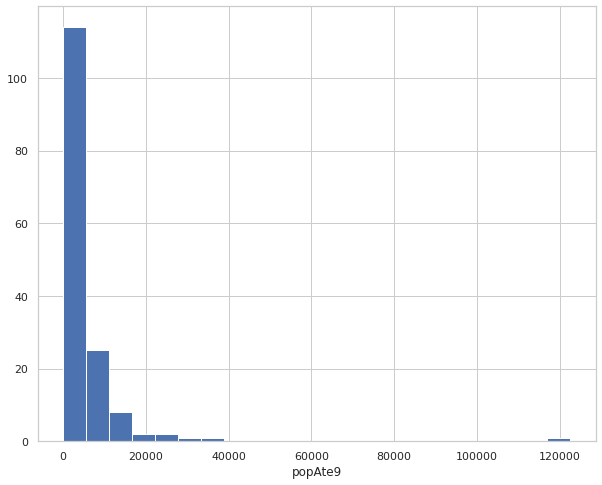

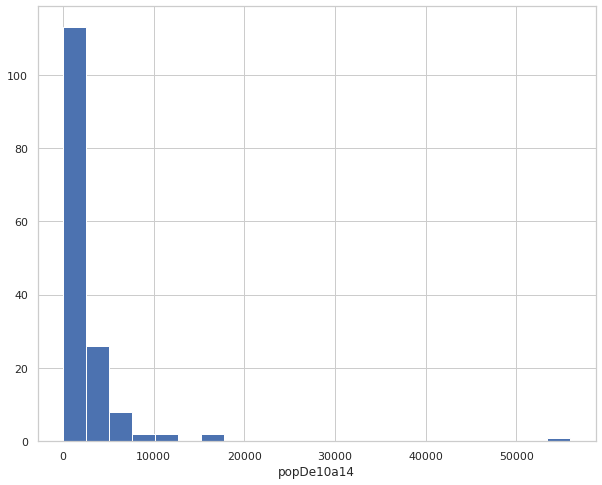

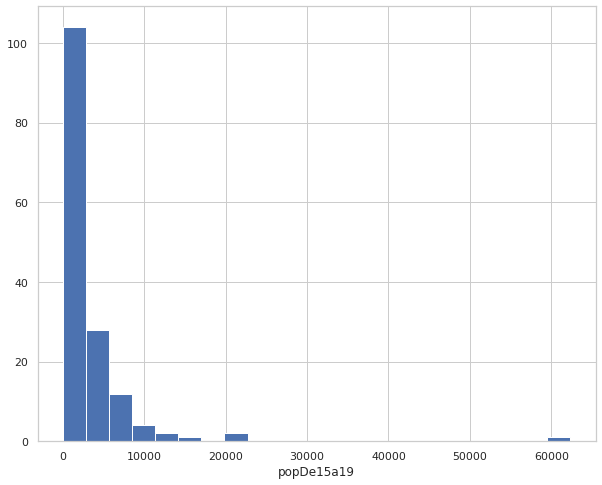

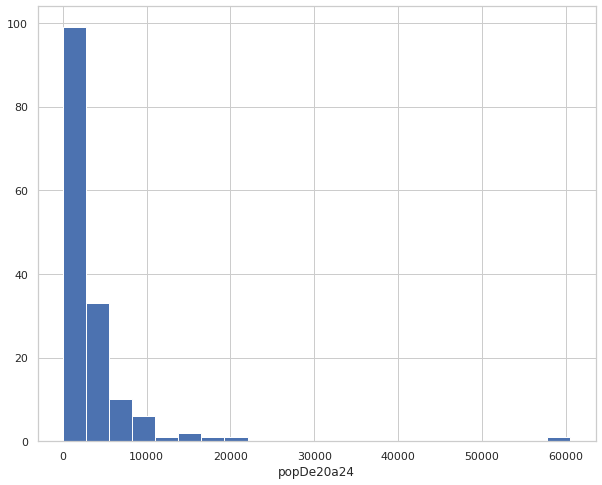

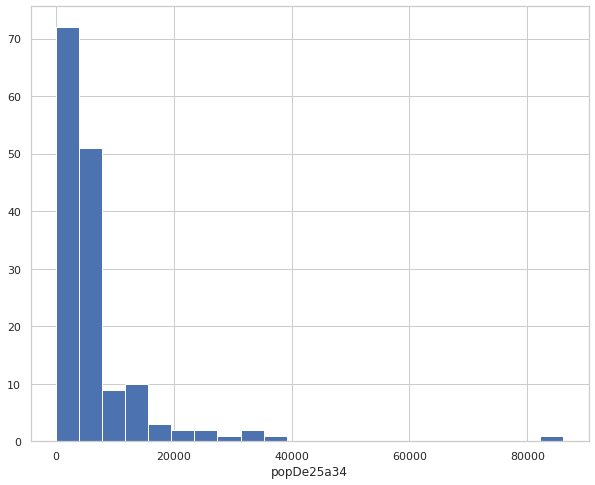

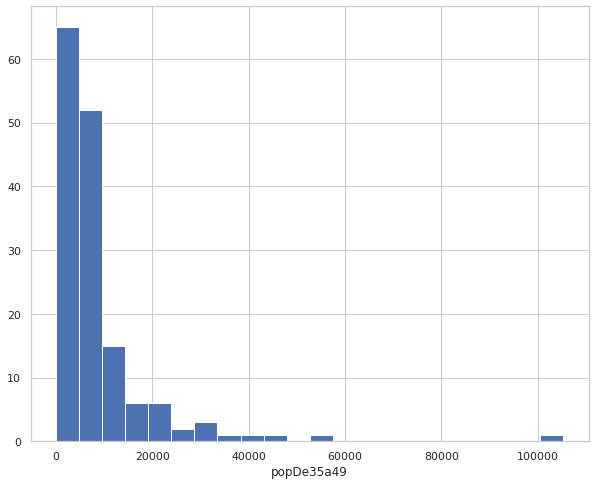

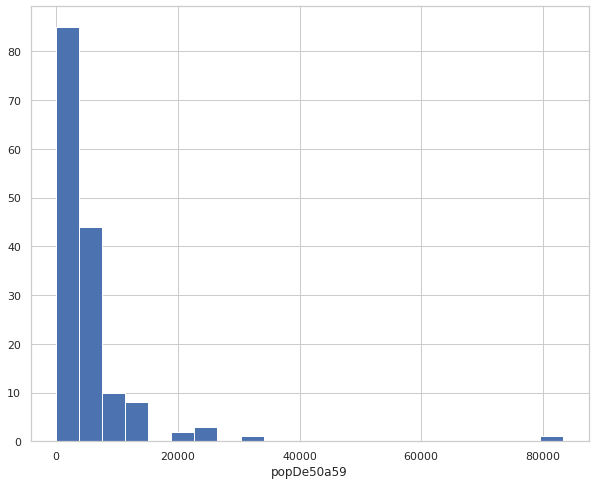

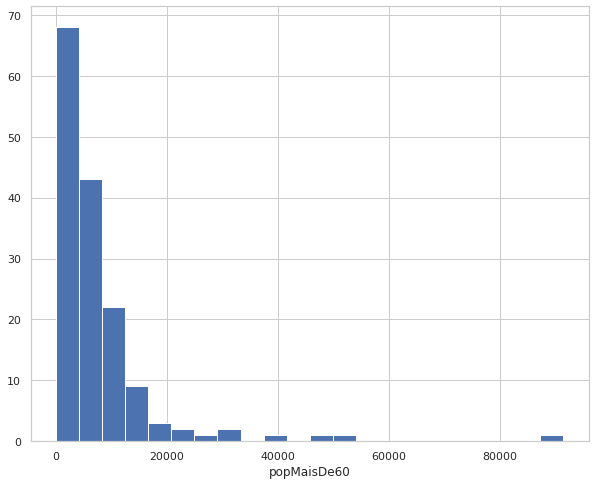

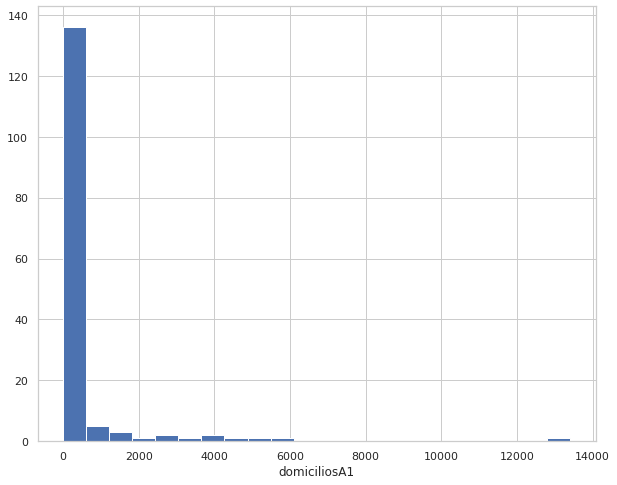

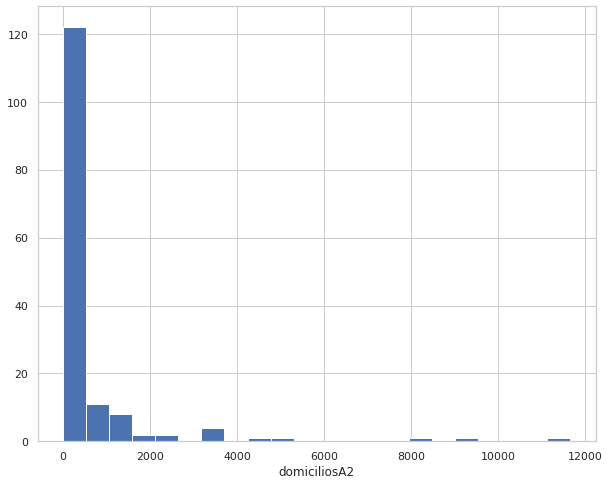

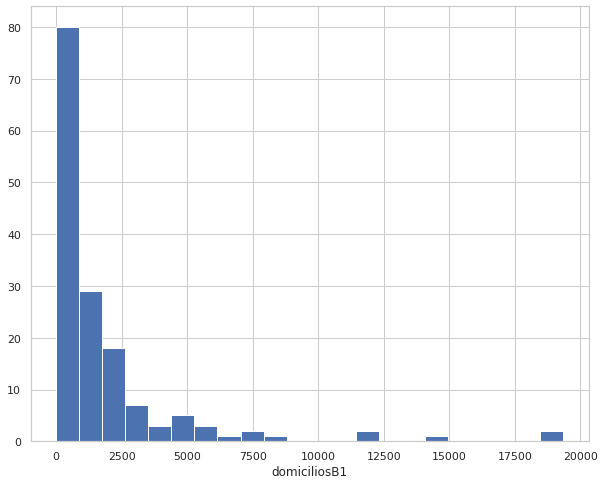

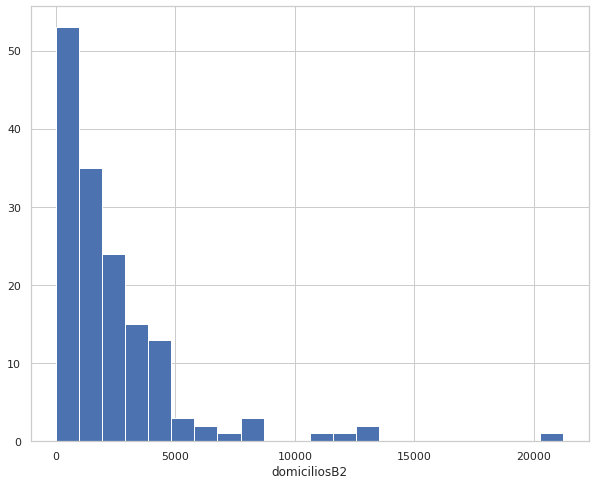

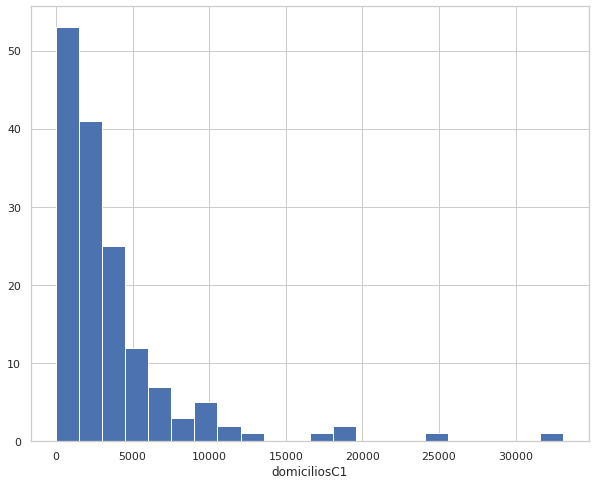

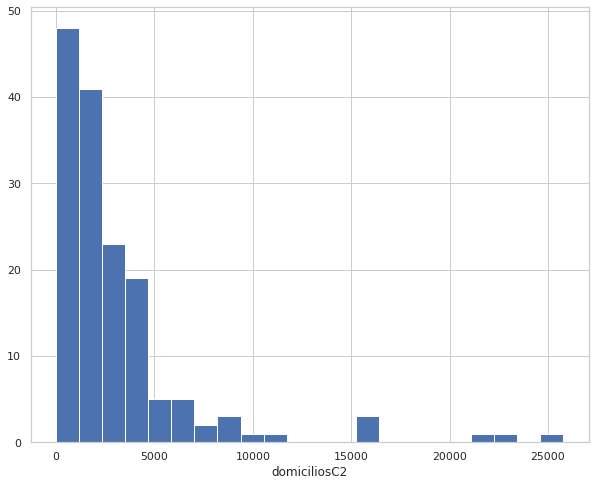

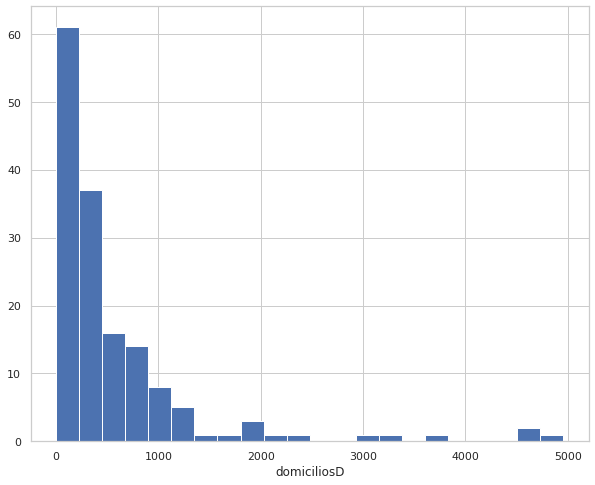

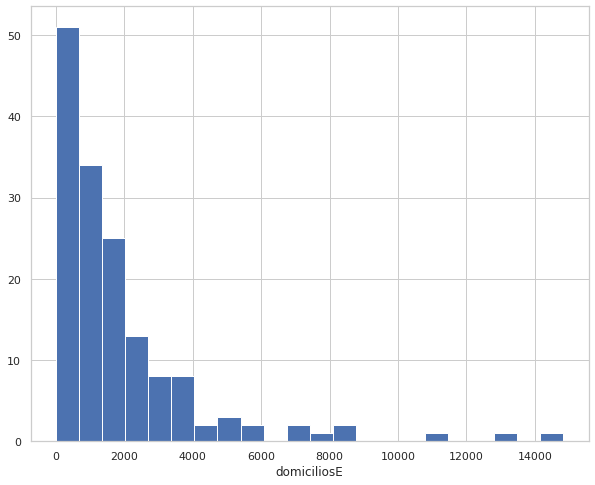

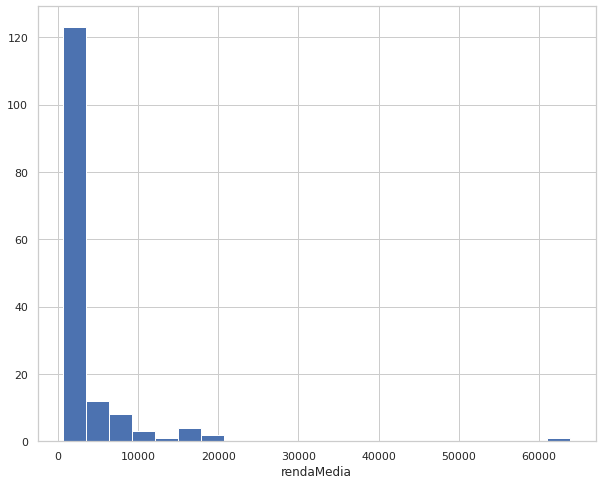

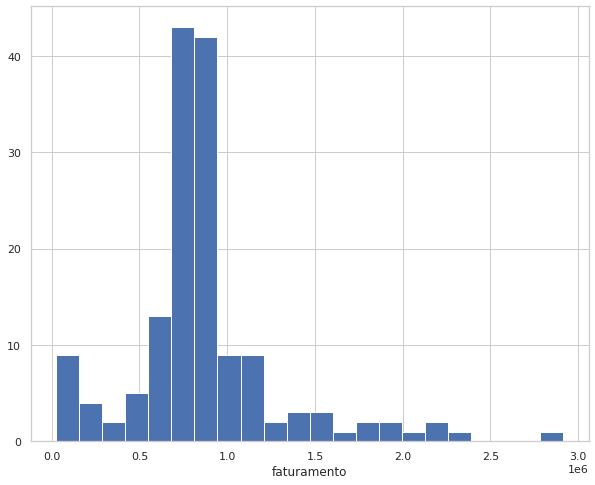

In [ ]:
for column in data.iloc[:,4:].columns:
  plt.figure(figsize=(10,8))
  plt.hist(data[column], bins=22)
  plt.xlabel(column)
  plt.show()

Usamos a mediana no exemplo abaixo, pois em relação a média, <b>a mediana é menos afetada por valores muito alto.</b>

Nos bairros há <b>uma concentração maior de pessoas de 35 a 49 anos de idade</b> e <b>uma concentração menor nas faixas de 10 a 14 anos.</b>

In [ ]:
print('Mediana das Faixas de Idade dos Bairros')
for column in data.columns[4:12]:
  print(column + ": " + str(np.median(data[column])))

Mediana das Faixas de Idade dos Bairros
popAte9: 3150.0
popDe10a14: 1450.5
popDe15a19: 2034.0
popDe20a24: 2183.5
popDe25a34: 4288.5
popDe35a49: 5675.0
popDe50a59: 3337.5
popMaisDe60: 4536.5


<b>Campo Grande</b> é o bairro com <b>maior número de pessoas</b> no total de pessoas e em todas as faixas etárias e apesar de possuir uma quantidade grande de pessoas, o faturamento não é o maior e sua renda mensal de cada domicilio é R$ 1856.

In [ ]:
data.loc[data['população'] == data['população'].max()]

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
23,Campo Grande,Rio de Janeiro,RJ,667603,122578,55935,62342,60567,86116,105316,83341,91408,0,1389,11747,21237,33111,25779,4956,12944,1856.0,69645.0


<b>Grumari</b> é bairro com <b>menor concentração de pessoas</b> menores da faixa de idade menores de 9 anos até maiores de 60 anos.

In [ ]:
data.loc[data['popDe10a14'] == data['popDe10a14'].min()]

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
60,Grumari,Rio de Janeiro,RJ,173,33,13,22,17,28,38,10,12,0,0,0,0,5,17,8,16,654.0,835491.0


<b>Barra Da Tijuca</b> é o bairro com <b>maior faturamento</b>, e possui uma renda mensal de R$ 18.084.

In [ ]:
data.loc[data['faturamento'] == data['faturamento'].max()]

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
9,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0


<b>Lagoa</b> é o bairro com <b>maior renda média</b> com R$ 63.887.

In [ ]:
data.loc[data['rendaMedia'] == data['rendaMedia'].max()]

,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
80,Lagoa,Rio de Janeiro,RJ,21795,1794,708,1054,1252,2943,4812,3594,5638,2916,2140,1931,697,365,306,0,469,63887.0,1775547.0


<b>Hipotese:</b> Bairros que possuem domicilios do tipo A1 e A2, geralmente as pessoas que moram nesses bairros possuem uma renda média alta.

<br>

A célula abaixo, estamos buscando a renda média e o faturamento de bairros que não possuem domicílios do tipo A1 e A2.

In [ ]:
data.loc[(data['domiciliosA1'] == 0) & (data['domiciliosA2'] == 0)].describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,40651.877551,5936.346939,2755.979592,3539.632653,3433.204082,6588.061224,8646.591837,4431.000000,5321.061224,0.0,0.0,521.673469,1738.510204,3638.632653,3886.857143,781.530612,2579.265306,1297.326531,597090.265306
std,39441.399851,6408.595967,2930.125086,3694.845857,3325.977143,6438.366862,8416.649474,4084.007509,4598.754802,0.0,0.0,461.553328,1514.817592,3421.116805,4086.859104,850.396920,2597.409597,246.844366,245621.802148
min,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.0,0.0,0.000000,0.000000,5.000000,17.000000,8.000000,16.000000,654.000000,24651.000000
25%,17734.000000,2079.000000,1011.000000,1299.000000,1409.000000,2814.000000,3598.000000,1939.000000,2490.000000,0.0,0.0,123.000000,631.000000,1667.000000,1384.000000,259.000000,1014.000000,1133.000000,527702.000000
50%,28018.000000,3735.000000,1842.000000,2363.000000,2405.000000,4614.000000,5959.000000,3468.000000,4410.000000,0.0,0.0,423.000000,1429.000000,2656.000000,2588.000000,456.000000,1796.000000,1244.000000,689701.000000
75%,46478.000000,6423.000000,3025.000000,3768.000000,3789.000000,7146.000000,9478.000000,5728.000000,7038.000000,0.0,0.0,754.000000,2295.000000,4599.000000,4180.000000,933.000000,3261.000000,1499.000000,774667.000000
max,223440.000000,35572.000000,16403.000000,20998.000000,18090.000000,34697.000000,46774.000000,23878.000000,27028.000000,0.0,0.0,2057.000000,8310.000000,18161.000000,22160.000000,4572.000000,14833.000000,1944.000000,851362.000000


Buscando bairros que possuem domicilios do tipo A1 e não possuem domicilios do tipo A2.

In [ ]:
data.loc[(data['domiciliosA1'] > 0) & (data['domiciliosA2'] == 0)].describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Buscando bairros que possuem domicilios do tipo A2 e não possuem domicilios do tipo A1.

In [ ]:
data.loc[(data['domiciliosA1'] == 0) & (data['domiciliosA2'] > 0)].describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01
mean,43201.132353,5614.691176,2664.470588,3424.426471,3422.779412,6331.558824,8614.088235,5597.294118,7531.823529,0.0,235.441176,1528.044118,2563.411765,3726.867647,2939.558824,538.764706,1625.558824,2230.308824,8.173040e+05
std,86482.178394,15271.974884,7005.904884,7956.591883,7717.275975,11491.580463,14539.949563,10808.456761,12225.329093,0.0,255.940897,1703.696179,3263.833275,5330.091192,4504.699955,919.114014,2389.192572,728.778476,2.099405e+05
min,1403.000000,175.000000,74.000000,120.000000,103.000000,125.000000,374.000000,72.000000,34.000000,0.0,3.000000,45.000000,88.000000,24.000000,3.000000,0.000000,2.000000,1287.000000,3.546500e+04
25%,11294.500000,1237.000000,580.750000,802.750000,826.000000,1770.000000,2359.250000,1469.500000,2084.750000,0.0,86.500000,526.250000,808.500000,976.750000,707.250000,99.500000,342.250000,1784.750000,7.793428e+05
50%,25230.000000,2524.000000,1212.500000,1667.500000,1842.000000,3790.000000,5362.000000,3257.500000,4379.500000,0.0,117.500000,1045.000000,1567.000000,2183.000000,1562.500000,303.000000,892.500000,2038.000000,8.512225e+05
75%,43672.250000,4633.750000,2238.750000,3110.500000,3206.500000,6544.000000,9366.000000,6174.000000,9196.000000,0.0,271.250000,1894.000000,3138.250000,4203.000000,3440.000000,515.000000,1851.750000,2416.500000,9.168718e+05
max,667603.000000,122578.000000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,0.0,1389.000000,11747.000000,21237.000000,33111.000000,25779.000000,4956.000000,12944.000000,5876.000000,1.200769e+06


Quando temos uma alta concentração de domicilios A1 e A2, <b>a renda média e o faturamento é maior.</b>

In [ ]:
data.loc[(data['domiciliosA1'] > 0) & (data['domiciliosA2'] > 0)].describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01
mean,46062.324324,4308.783784,1937.135135,2800.243243,3258.729730,7318.648649,9769.000000,6215.918919,10453.864865,1631.459459,2050.540541,4228.0000,2958.864865,3258.054054,2237.027027,376.648649,1324.891892,9200.351351,1.329018e+06
std,46167.834951,4955.177428,2137.328488,3025.237359,3523.691977,7601.151960,9691.951274,6201.602554,11840.067852,2569.870291,2687.534719,4926.3209,3142.444185,3651.020496,2927.108456,585.059456,1514.061183,10660.943856,5.902822e+05
min,842.000000,61.000000,29.000000,35.000000,46.000000,131.000000,192.000000,132.000000,174.000000,4.000000,47.000000,57.0000,33.000000,7.000000,8.000000,0.000000,20.000000,1495.000000,9.467100e+04
25%,13660.000000,1100.000000,546.000000,739.000000,961.000000,2256.000000,2922.000000,1741.000000,2345.000000,142.000000,334.000000,862.0000,788.000000,815.000000,457.000000,75.000000,289.000000,3443.000000,1.004569e+06
50%,33122.000000,2706.000000,1311.000000,1957.000000,2390.000000,5010.000000,7302.000000,3594.000000,6360.000000,510.000000,1139.000000,2290.0000,2016.000000,2141.000000,1369.000000,162.000000,827.000000,6499.000000,1.204467e+06
75%,51234.000000,4547.000000,2130.000000,2887.000000,3499.000000,8071.000000,9850.000000,7426.000000,14361.000000,2423.000000,2352.000000,5463.0000,4011.000000,3911.000000,2895.000000,414.000000,1575.000000,10573.000000,1.626856e+06
max,168267.000000,24961.000000,10376.000000,13874.000000,16321.000000,32572.000000,35693.000000,23892.000000,51445.000000,13408.000000,11668.000000,19350.0000,13160.000000,17034.000000,15909.000000,3178.000000,6837.000000,63887.000000,2.915612e+06


<h3><b>Modelo -  Regressão Linear</b></h3>

In [ ]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Verificando a distribuição de cada coluna, e a correlação das variáveis independente com a variável dependente

<b>Obs:</b> Apliquei o logaritmo nas variável independentes para obter uma distribuição normal, mas no modelo não apresentou melhoras significativas

Coluna:  população
Correlação {column} com faturamento:  [[ 1.         -0.16929952]
 [-0.16929952  1.        ]]


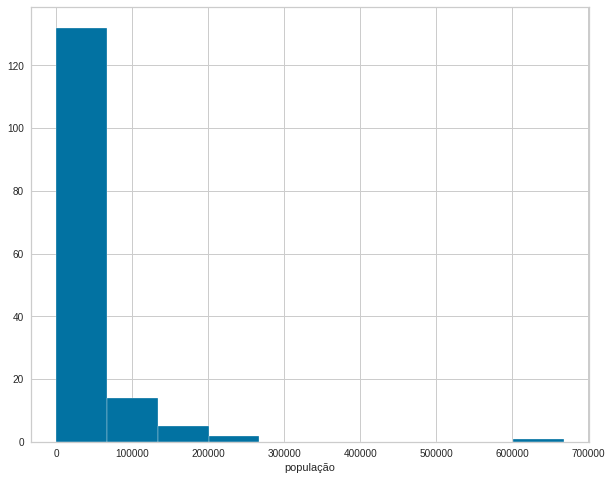

Coluna:  popAte9
Correlação {column} com faturamento:  [[ 1.        -0.3020871]
 [-0.3020871  1.       ]]


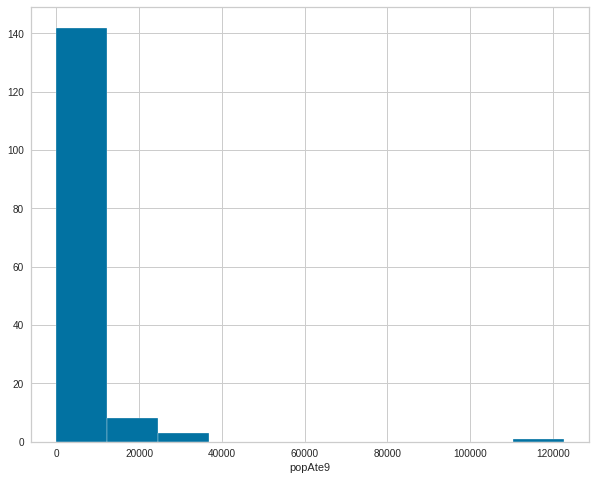

Coluna:  popDe10a14
Correlação {column} com faturamento:  [[ 1.         -0.30824447]
 [-0.30824447  1.        ]]


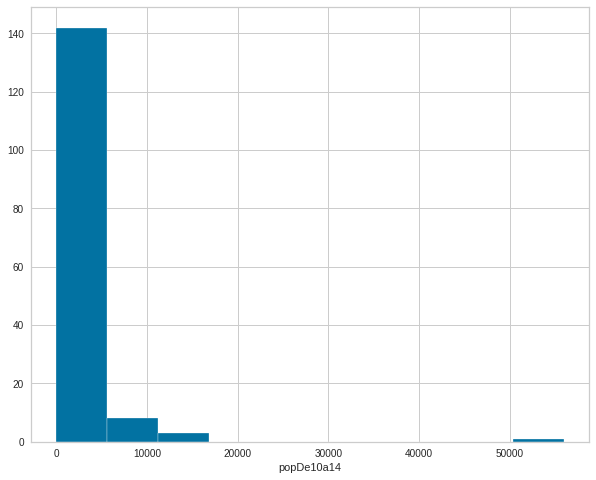

Coluna:  popDe15a19
Correlação {column} com faturamento:  [[ 1.         -0.29633568]
 [-0.29633568  1.        ]]


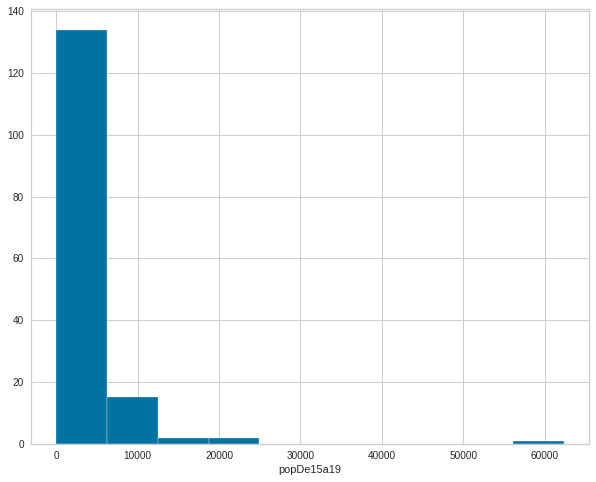

Coluna:  popDe20a24
Correlação {column} com faturamento:  [[ 1.         -0.25296746]
 [-0.25296746  1.        ]]


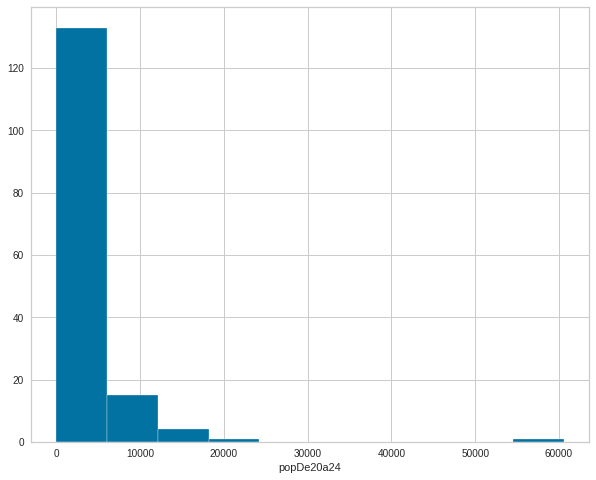

Coluna:  popDe25a34
Correlação {column} com faturamento:  [[ 1.         -0.19831738]
 [-0.19831738  1.        ]]


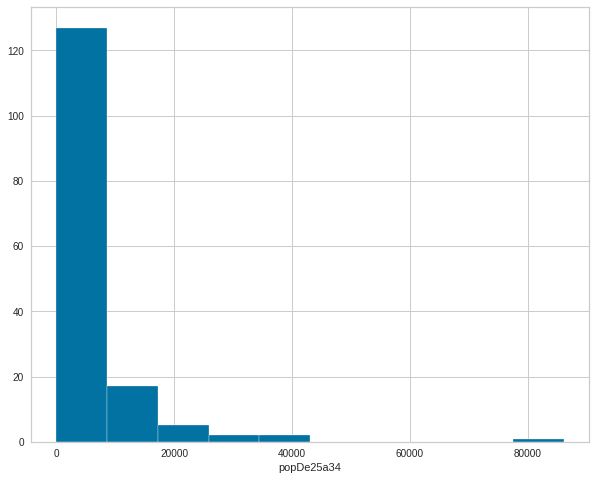

Coluna:  popDe35a49
Correlação {column} com faturamento:  [[ 1.         -0.17475864]
 [-0.17475864  1.        ]]


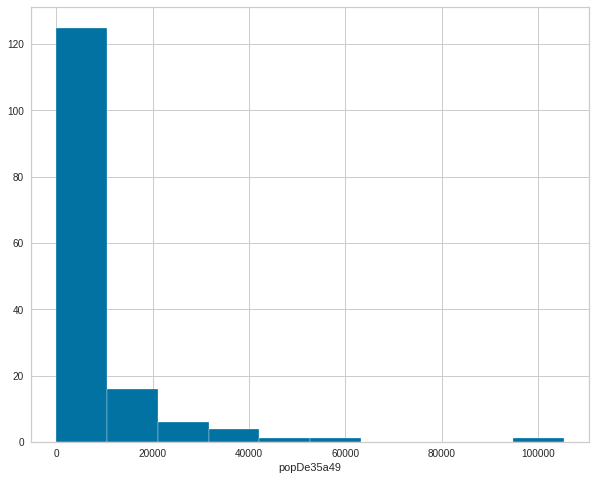

Coluna:  popDe50a59
Correlação {column} com faturamento:  [[ 1.         -0.07045146]
 [-0.07045146  1.        ]]


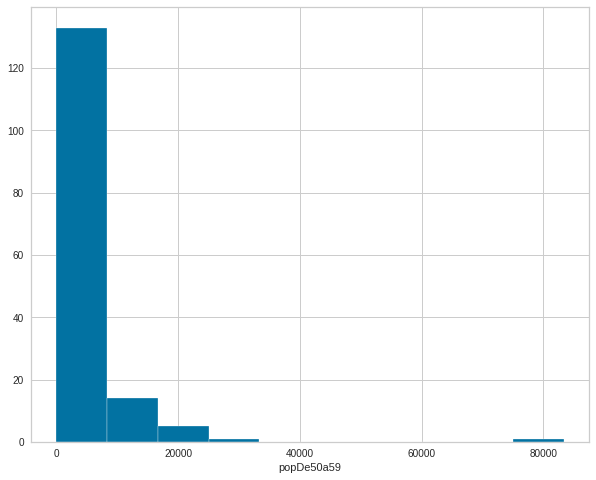

Coluna:  popMaisDe60
Correlação {column} com faturamento:  [[1.         0.13765419]
 [0.13765419 1.        ]]


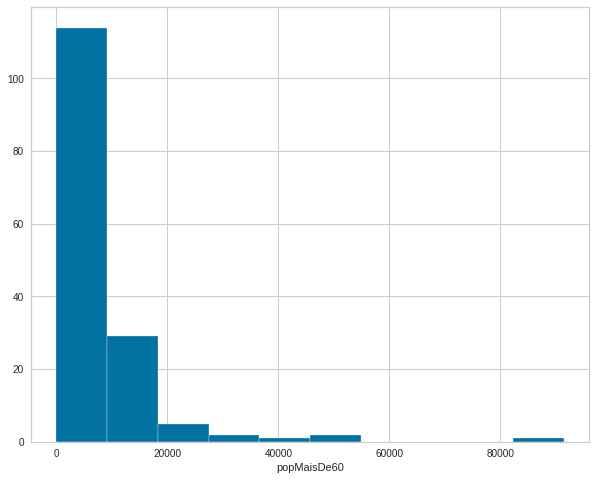

Coluna:  domiciliosA1
Correlação {column} com faturamento:  [[1.         0.75735992]
 [0.75735992 1.        ]]


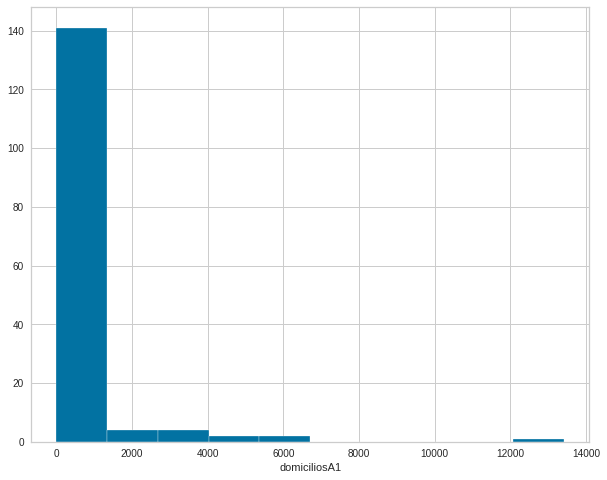

Coluna:  domiciliosA2
Correlação {column} com faturamento:  [[1.         0.78190096]
 [0.78190096 1.        ]]


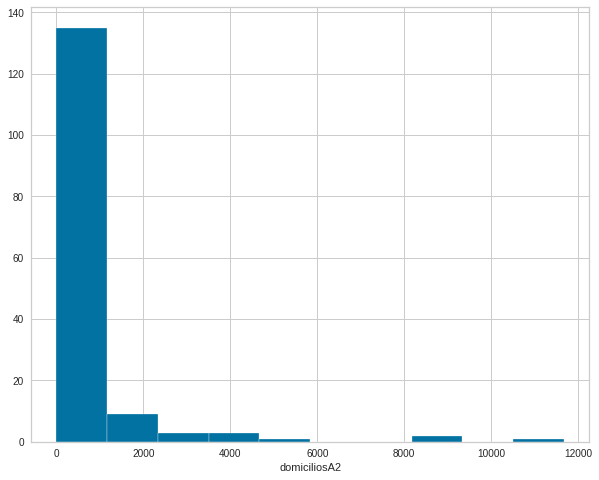

Coluna:  domiciliosB1
Correlação {column} com faturamento:  [[1.         0.61198774]
 [0.61198774 1.        ]]


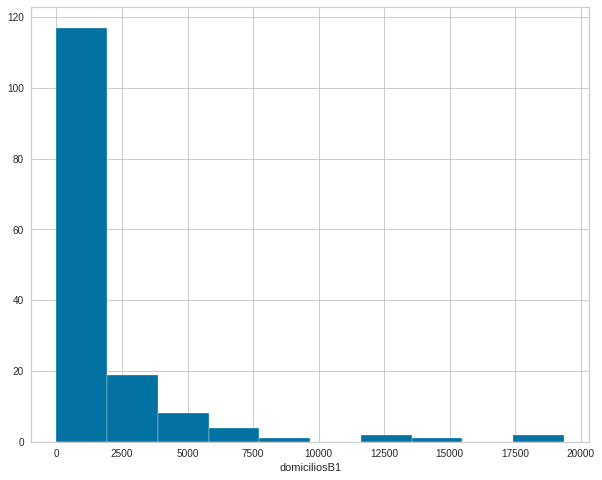

Coluna:  domiciliosB2
Correlação {column} com faturamento:  [[1.         0.00909576]
 [0.00909576 1.        ]]


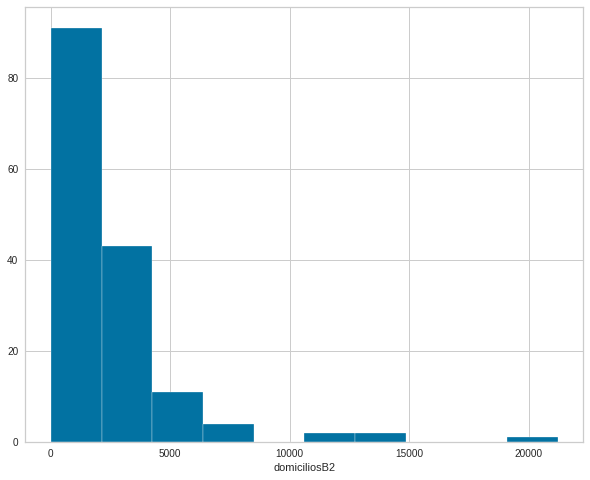

Coluna:  domiciliosC1
Correlação {column} com faturamento:  [[ 1.         -0.32710782]
 [-0.32710782  1.        ]]


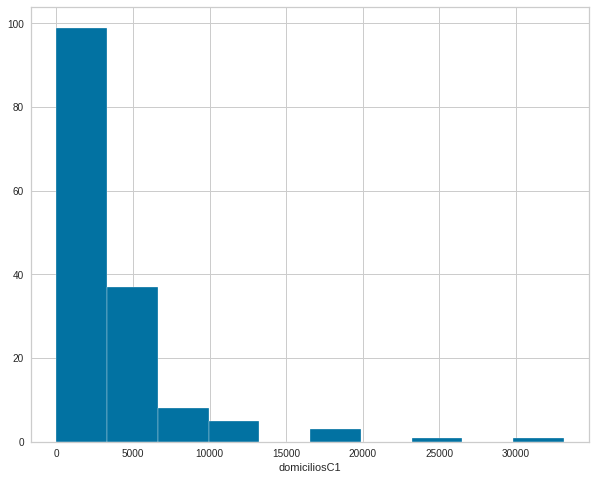

Coluna:  domiciliosC2
Correlação {column} com faturamento:  [[ 1.         -0.48188244]
 [-0.48188244  1.        ]]


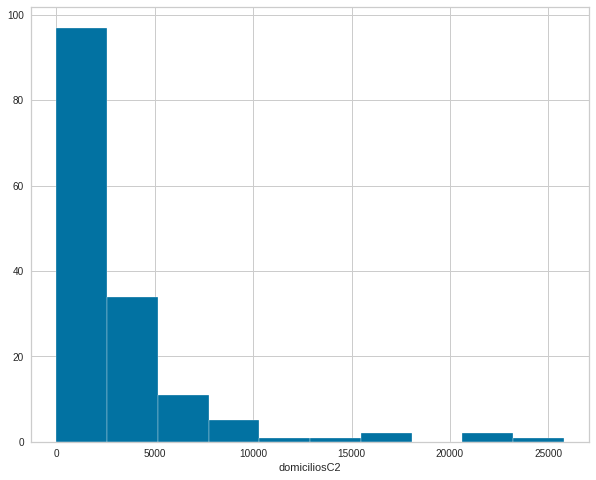

Coluna:  domiciliosD
Correlação {column} com faturamento:  [[ 1.         -0.51500534]
 [-0.51500534  1.        ]]


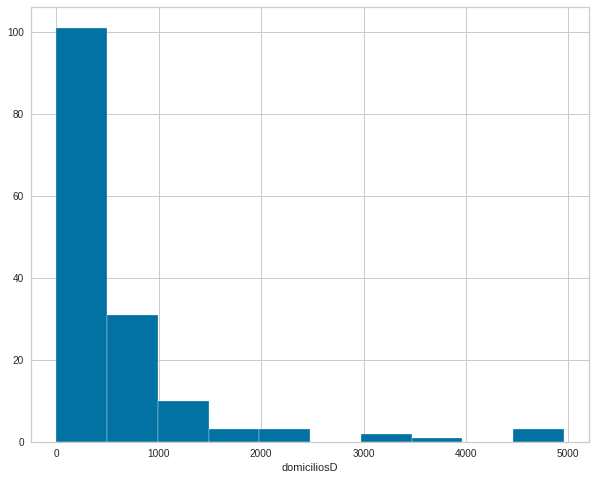

Coluna:  domiciliosE
Correlação {column} com faturamento:  [[ 1.         -0.41467479]
 [-0.41467479  1.        ]]


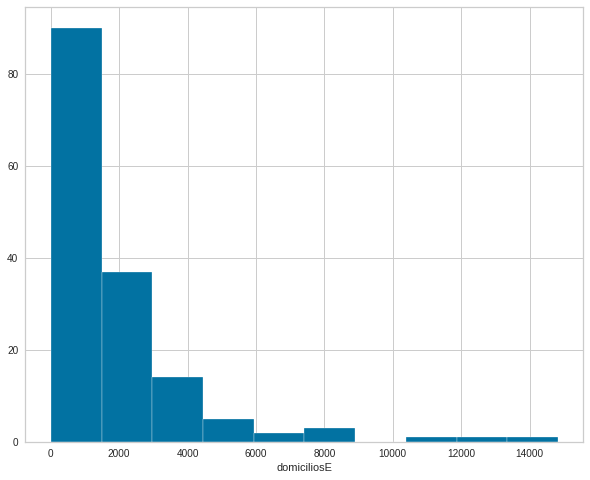

Coluna:  rendaMedia
Correlação {column} com faturamento:  [[1.         0.55633544]
 [0.55633544 1.        ]]


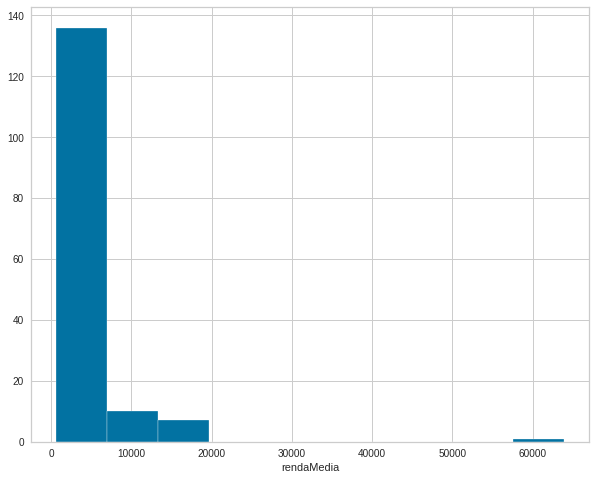

In [ ]:
columns = ['população', 'popAte9', 'popDe10a14', 'popDe15a19', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'popDe50a59', 'popMaisDe60',	'domiciliosA1','domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE', 'rendaMedia']
for column in columns:
  try:
    print("Coluna: ", column)
    print("Correlação {column} com faturamento: ", np.corrcoef(data[column], data['faturamento']))
    plt.figure(figsize=(10,8))
    plt.hist(data[column])
    plt.xlabel(column)
    plt.show()
  except:
    continue

Obtendo as variáveis independentes para o modelo

In [ ]:
X = np.array(data.iloc[:,12:21].values)

Obtendo as variáveis dependentes para o modelo

In [ ]:
y = np.array(data.iloc[:,21:22])

Criando o modelo de regressão linear, aplicando as variáveis para treinar o modelo e mensurando a performace do modelo

In [ ]:
model = LinearRegression()
model.fit(X, y)

model.score(X, y)

0.9422462598582365

Realizando um previsão com modelo treinado

In [ ]:
test = np.array([0, 150, 700, 1200, 900, 750, 100, 300, 2500]).reshape(1, -1)

In [ ]:
model.predict(test)

array([[919107.92800056]])

Obtendo o coeficiente de correlação do model, o modelo obteve um bom valor para o R^2 com o valor de 0.94, a distribuição dos valores no gráfico no lado direito mostra uma boa distribuição

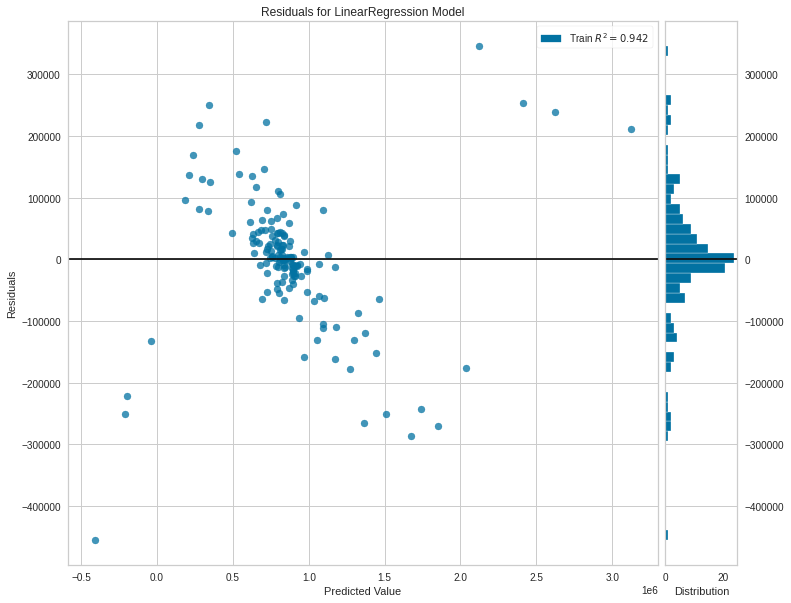

In [ ]:
plt.figure(figsize=(12,10))
visualizar = ResidualsPlot(model)
visualizar.fit(X, y)
visualizar.poof()